<h3> This is the Monthly prediction of Google stock you can choose any stock data and change it's symbol in the code below</h3>

Importing libraries -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from dateutil.parser import parse

Import your own Aplha Vantage API key and the symbol of the stock you want to predict the data of - 

In [13]:
api_key = "AABCA71GGJ5WS2LZ"
symbol = ["GOOGL"]

Initialize empty DataFrames to store data for all stocks

In [14]:
dfs = []

Define the API url for the current stock and make a GET request to retreive the data

In [57]:
for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbol}&apikey={api_key}"
    r = requests.get(url)
    data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2023-09-28', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-09-28': {'1. open': '129.8400', '2. high': '133.3000', '3. low': '129.7900', '4. close': '132.3100', '5. volume': '22179507'}, '2023-09-27': {'1. open': '128.5700', '2. high': '130.8950', '3. low': '128.5700', '4. close': '130.5400', '5. volume': '22746452'}, '2023-09-26': {'1. open': '129.7700', '2. high': '130.3645', '3. low': '127.2200', '4. close': '128.5650', '5. volume': '25718704'}, '2023-09-25': {'1. open': '129.8300', '2. high': '131.1700', '3. low': '128.9600', '4. close': '131.1100', '5. volume': '20094643'}, '2023-09-22': {'1. open': '130.7600', '2. high': '132.0250', '3. low': '129.6000', '4. close': '130.2500', '5. volume': '26397337'}, '2023-09-21': {'1. open': '131.4400', '2. high': '132.2300', '3. low': '130.0700', '4. close': '130.4400', '

Check if 'Monthly Time Series' availabe in data

In [58]:
if 'Monthly Time Series' in data:
    monthly_data = data['Monthly Time Series']

Convert data into dataframe and sort dataframe by the date

In [59]:
df = pd.DataFrame.from_dict(monthly_data, orient="index")
df.index = [parse(date) for date in df.index]  
df = df.sort_index()

Extract the 'Close' prices

In [27]:
if '4. close' in df:
    close_prices = df['4. close'].astype(float)

Normalize the 'Close' prices

In [28]:
scaler = MinMaxScaler()
close_prices_normalized = scaler.fit_transform(close_prices.values.reshape(-1, 1))

Define sequence length and split data into sequences

In [29]:
sequence_length = 10
sequences = []
next_month_close_prices = []

for i in range(len(close_prices_normalized) - sequence_length):
    sequences.append(close_prices_normalized[i:i + sequence_length])
    next_month_close_prices.append(close_prices_normalized[i + sequence_length])

Convert lists to NumPy arrays

In [30]:
X = np.array(sequences)
y = np.array(next_month_close_prices)

Split the data into training and testing sets

In [31]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Build an LSTM model

In [32]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [48]:
model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
3/3 [==============================] - 0s 9ms/step - loss: 5.2864e-04
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 5.3338e-04
Epoch 3/200
3/3 [==============================] - 0s 10ms/step - loss: 5.2195e-04
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 5.2981e-04
Epoch 5/200
3/3 [==============================] - 0s 9ms/step - loss: 5.5088e-04
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 5.2061e-04
Epoch 7/200
3/3 [==============================] - 0s 10ms/step - loss: 5.4575e-04
Epoch 8/200
3/3 [==============================] - 0s 10ms/step - loss: 5.3678e-04
Epoch 9/200
3/3 [==============================] - 0s 10ms/step - loss: 5.4715e-04
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 5.4254e-04
Epoch 11/200
3/3 [==============================] - 0s 10ms/step - loss: 5.3781e-04
Epoch 12/200
3/3 [==============================] - 0s 9ms/step - loss: 5.3552e-04
Epoch 

Epoch 196/200
3/3 [==============================] - 0s 9ms/step - loss: 5.1155e-04
Epoch 197/200
3/3 [==============================] - 0s 9ms/step - loss: 5.0045e-04
Epoch 198/200
3/3 [==============================] - 0s 10ms/step - loss: 5.0684e-04
Epoch 199/200
3/3 [==============================] - 0s 10ms/step - loss: 4.9921e-04
Epoch 200/200
3/3 [==============================] - 0s 9ms/step - loss: 5.0245e-04


Make predictions

In [49]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


Inverse transform predictions to original scale

In [50]:
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

Calculate Mean Squared Error (MSE) as an evaluation metric

In [51]:
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 156874.7663246211


Plot actual vs. predicted prices

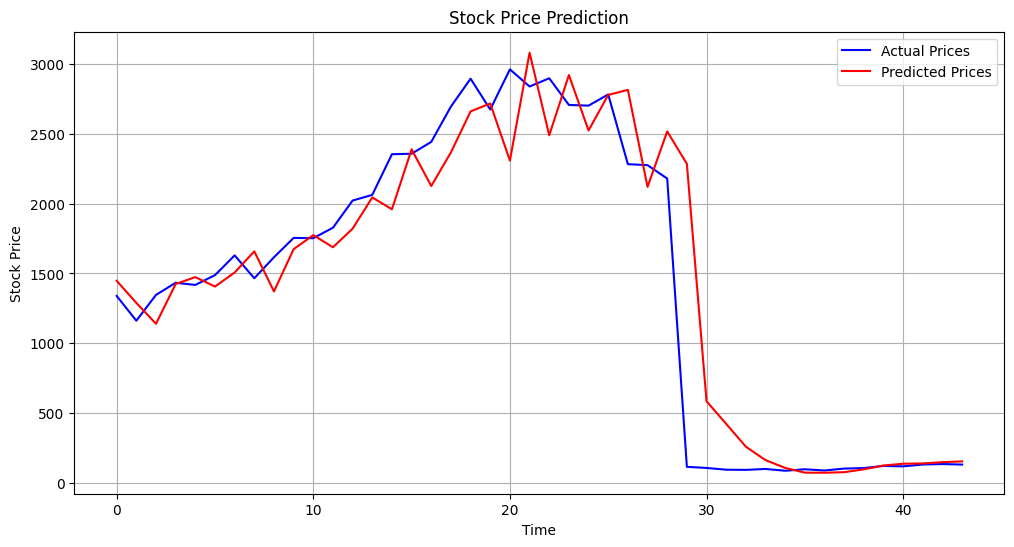

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()